# Descriptive Statistic

In [28]:
import pandas as pd
import numpy as np

In [29]:
df = pd.read_excel('dataset.xlsx')
print (df.sample(10))
AT = df[['AT']]
V = df[['V']]
AP = df[['AP']]
RH = df[['RH']]
PE = df[['PE']]

         AT      V       AP     RH      PE
5050  24.10  71.97  1009.92  91.27  443.09
6369  31.74  67.32  1013.69  36.59  436.17
6191  26.35  59.87  1013.24  73.63  447.26
3230  21.03  67.45  1015.01  68.59  447.11
4885   6.65  40.69  1020.11  89.84  479.35
8432  27.23  44.05  1005.69  58.91  440.20
3070  23.79  58.49  1011.00  75.39  445.87
1627  28.59  69.84  1003.79  67.31  427.53
2436  11.24  25.36  1009.26  97.47  469.92
6667  10.04  39.13  1011.26  88.91  474.61


In [30]:
df.shape

(9568, 5)

9568 rows which means there are 9568 data in total
5 columnns which means 5 vaibles

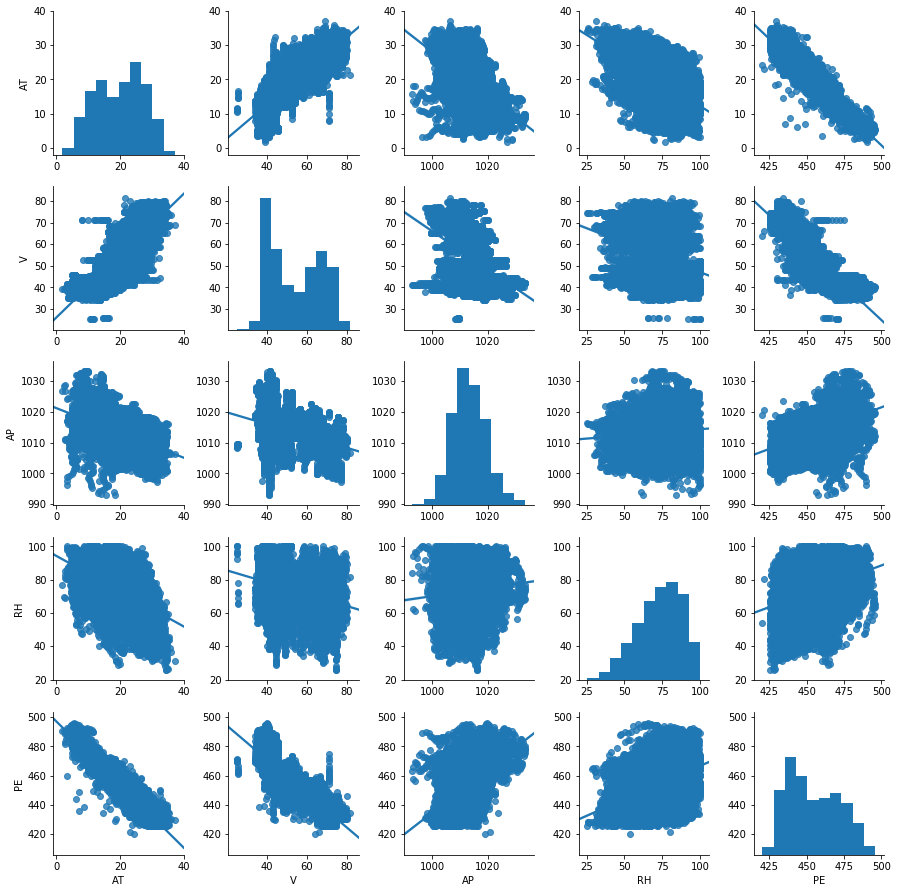

In [31]:
import seaborn as sns
sns.pairplot(df, kind="reg")
from matplotlib import pyplot as plt
plt.show()

# Simple Linear Regression

In [32]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

a2 = []
a = [AT,V,AP,RH]

for i in a:
    results = smf.ols('PE ~ i', data=df).fit()
    print(results.summary())
    a1 = results.params
    a2.append(a1)
a2

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:27:26   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    497.0341      0.156   3177.280      0.0

[Intercept    497.03412
 i             -2.17132
 dtype: float64, Intercept    517.801526
 i             -1.168135
 dtype: float64, Intercept   -1055.260989
 i               1.489872
 dtype: float64, Intercept    420.961766
 i              0.455650
 dtype: float64]

In [33]:
plt.show()

# Q:
In which of the models is there a statistically significant association between the predictor and the response? Create some plots to back up your assertions. Are there any outliers that you would like to remove from your data for each of these regression tasks?

All of these four models are statistically significant because their p-value is under .005. Yes, there are outliers I would like to remove.

# Multiple Linear Regression

In [34]:
results = smf.ols('PE ~ AT+V+AP+RH', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:27:26   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    454.6093      9.749     46.634      0.0

# Q: 
For which predictors can we reject the null hypothesis H0 :βj =0?

The p-value is under .005 so we keep all the result. βj is not equal to 0 so we reject null hypothesis.

# Compare Simple to Multiple

In [35]:
print(results.params)
print(a2)

Intercept    454.609274
AT            -1.977513
V             -0.233916
AP             0.062083
RH            -0.158054
dtype: float64
[Intercept    497.03412
i             -2.17132
dtype: float64, Intercept    517.801526
i             -1.168135
dtype: float64, Intercept   -1055.260989
i               1.489872
dtype: float64, Intercept    420.961766
i              0.455650
dtype: float64]


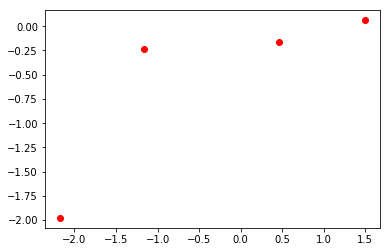

In [36]:
x = [-2.17132, -1.168135, 1.489872, 0.455650]
y = [-1.977513, -0.233916, 0.062083, -0.158054]
import matplotlib.pyplot as plt
plt.plot(x,y,'ro')
plt.show()

# Nonlinear Association

In [48]:
import statsmodels.api as sm
AT=pd.DataFrame(AT)
V=pd.DataFrame(V)
AP=pd.DataFrame(AP)
RH=pd.DataFrame(RH)
PE=pd.DataFrame(PE)
a=pd.concat([AT,V,AP,RH],axis=1)
a.columns=['AT','V','AP','RH']
for i in a:
    df1 = pd.concat([a[i],a[i]**2,a[i]**3],axis=1)
    df1.columns = ['x','x2','x3']
    X = sm.add_constant(df1)
    results=sm.OLS(PE,X).fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                 3.299e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:30:27   Log-Likelihood:                -29101.
No. Observations:                9568   AIC:                         5.821e+04
Df Residuals:                    9564   BIC:                         5.824e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        492.7281      0.673    732.248      0.0

# Interactions of Predictors

In [59]:
df2 = pd.concat([AT,V,AP,RH,a['AT']*a['V'],a['AT']*a['AP'],a['AT']*a['RH'],a['V']*a['AP'],a['V']*a['RH'],a['AP']*a['RH']],axis=1)
df2.columns = ['AT','V','AP','RH','AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH']
X = sm.add_constant(df2)
results=sm.OLS(PE,X).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        20:34:52   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

# Improve Model by Training

# Split traningset and testingset

In [101]:
import numpy as np
from sklearn.model_selection import train_test_split

X=pd.concat([AT,V,AP,RH],axis=1)
X.columns=['AT','V','AP','RH']

y=pd.DataFrame(PE)

X_train, X_test, y_trian, y_test = train_test_split(X,y,test_size=0.3)

AT_train = X_train['AT']
V_train = X_train['V']
AP_train = X_train['AP']
RH_train = X_train['RH']
PE_train = y_trian['PE']

AT_train.columns = ['AT']
V_train.columns = ['V_train']
AP_train.columns = ['AP_train']
RH_train.columns = ['RH_train']
PE_train.columns = ['PE_train']

df_train = pd.concat([AT_train,V_train,AP_train,RH_train,PE_train],axis=1)

# Model_1

In [102]:
results = smf.ols('PE_train ~ AT_train + V_train + AP_train + RH_train', data=df_train).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               PE_train   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                 2.209e+04
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:58:21   Log-Likelihood:                -19619.
No. Observations:                6697   AIC:                         3.925e+04
Df Residuals:                    6692   BIC:                         3.928e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    447.8631     11.602     38.603      0.0

In [142]:
AT_test = X_test['AT']
V_test = X_test['V']
AP_test = X_test['AP']
RH_test = X_test['RH']
PE_test = y_test['PE']

AT_test.columns = ['AT_test']
V_test.columns = ['V_test']
AP_test.columns = ['AP_test']
RH_test.columns = ['RH_test']
PE_test.columns = ['PE_test']

df_train = pd.concat([AT_train,V_train,AP_train,RH_train,PE_train],axis=1)
df_test = pd.concat([AT_test,V_test,AP_test,RH_test,PE_test],axis=1)

# Model_2

In [104]:
AT_train = X_train['AT']
V_train = X_train['V']
AP_train = X_train['AP']
RH_train = X_train['RH']
PE_train = y_trian['PE']

df3 = pd.concat([AT_train,V_train,AP_train,RH_train,
                 AT_train*V_train,AT_train*AP_train,
                 AT_train*RH_train,V_train*AP_train,
                 V_train*RH_train,AP_train*RH_train,
                 AT_train**2,AT_train**3,
                 V_train**2,V_train**3,
                 AP_train**2,AP_train**3,
                 RH_train**2,RH_train**3],axis=1)
df3.columns = ['AT','V','AP','RH',
               'AT*V','AT*AP','AT*RH','V*AP','V*RH','AP*RH',
               'x1','x2','x3','x4','x5','x6','x7','x8']
X = sm.add_constant(df3)
results=sm.OLS(PE_train,X).fit()
print(results.summary())
import statsmodels.api as sm
AT=pd.DataFrame(AT)
V=pd.DataFrame(V)
AP=pd.DataFrame(AP)
RH=pd.DataFrame(RH)
PE=pd.DataFrame(PE)
a=pd.concat([AT,V,AP,RH],axis=1)
a.columns=['AT','V','AP','RH']
for i in a:
    df1 = pd.concat([a[i],a[i]**2,a[i]**3],axis=1)
    df1.columns = ['x','x2','x3']
    X = sm.add_constant(df1)
    results=sm.OLS(PE,X).fit()
    print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     6144.
Date:                Wed, 06 Feb 2019   Prob (F-statistic):               0.00
Time:                        21:58:24   Log-Likelihood:                -19089.
No. Observations:                6697   AIC:                         3.821e+04
Df Residuals:                    6679   BIC:                         3.834e+04
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0213      0.004     -4.839      0.0

# KNN Regression

# Compare KNN Regression with Linear Regression

In [126]:
from sklearn import preprocessing

x_norm_train=preprocessing.normalize(X_train)
x_norm_train=pd.DataFrame(x_norm_train)

x_norm_test=preprocessing.normalize(X_test)
x_norm_test=pd.DataFrame(x_norm_test)

x_norm_train=pd.concat([x_norm_train[0],x_norm_train[1],x_norm_train[2],x_norm_train[3]],axis=1)
x_norm_train.columns=['AT','V','AP','RH']

x_norm_test=pd.concat([x_norm_test[0],x_norm_test[1],x_norm_test[2],x_norm_test[3]],axis=1)
x_norm_test.columns=['AT','V','AP','RH']

The best k is 12
The least error is 0.0617129369913


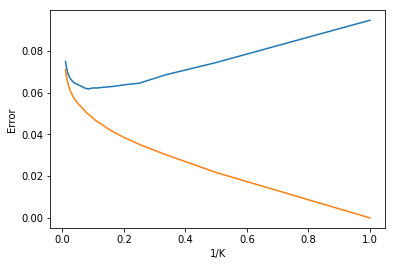

In [139]:
from sklearn.neighbors import KNeighborsRegressor
k_range = np.arange(1, 101, 1)
k_scores = []
k_scores2 = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(x_norm_train, PE_train)
    scores2 = 1 - knn.score(x_norm_train, PE_train)
    scores = 1 - knn.score(x_norm_test, y_test)
    k_scores.append(scores)
    k_scores2.append(scores2)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])

error_least = min(k_scores)
print('The least error is',error_least)

k1 = 1/k_range

plt.plot(k1, k_scores)
plt.plot(k1, k_scores2)

plt.xlabel('1/K')
plt.ylabel('Error')

plt.legend()

plt.show()

The best k is 6
The least error is 0.0541220466218


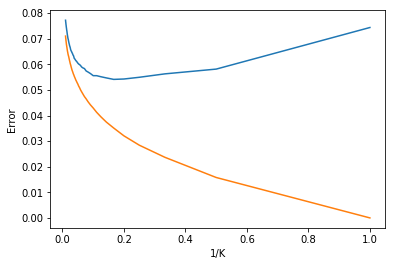

In [140]:
from sklearn.neighbors import KNeighborsRegressor
k_range = np.arange(1, 101, 1)
k_scores = [] 
k_scores2 = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k, metric='minkowski', p=1)
    knn.fit(X_train, PE_train)
    scores2 = 1 - knn.score(X_train, PE_train)
    scores = 1 - knn.score(X_test, y_test)
    k_scores.append(scores)
    k_scores2.append(scores2)
    
error_least = min(k_scores)
least_location = k_scores.index(error_least)
print('The best k is', k_range[least_location])
error_least = min(k_scores)
print('The least error is',error_least)

k1 = 1/k_range

plt.plot(k1, k_scores)
plt.plot(k1, k_scores2)

plt.xlabel('1/K')
plt.ylabel('Error')

plt.legend()

plt.show()

The second one has a smaller error.

0.0617129369913
0.0541220466218

ISLR: 2.4.1

a. flexible is better in case of underfitting.
b. inflexible is better in case of overfitting.
c. When it is non-linear, choose a flexible method is better in case of underfitting.
d. inflexible is better because bigger variance means it is more flexible.

ISLR: 2.4.7

a1 = [0,3,0,1]
a2 = [2,0,0,1]
a3 = [0,1,3,1]
a4 = [0,1,2,0]
a5 = [-1,0,1,0]
a6 = [1,1,1,1]

a. Euclidean distance = sqrt(x1*2 + x2*2 + .. + xn*2)
b. Green because the nearest point is point5 which is green
c. Red 
d. Small because more flexible means: less linear, bigger 1/k, smaller k.